In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping
from keras.layers import Embedding
from keras.layers import GRU
from keras.layers import Reshape
from sklearn.metrics import f1_score

In [4]:
from re import X
data = pd.read_csv('SquatData.csv')
X = data[data.columns[1:]]
Y = data[data.columns[0]].apply(lambda x: 1 if x == 'c' else 0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
callback = EarlyStopping(monitor='val_loss',patience=10)

### **Nerual Network**

In [25]:
model = Sequential()
model.add(Dense(126, input_dim=5032, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
history=model.fit(X_train, Y_train, epochs =100,validation_split = .15, callbacks=[callback])

Epoch 1/100
3/3 [==============================] - 4s 250ms/step - loss: 0.6572 - accuracy: 0.6618 - val_loss: 0.4314 - val_accuracy: 0.8333
Epoch 2/100
3/3 [==============================] - 0s 52ms/step - loss: 0.4043 - accuracy: 0.8088 - val_loss: 0.4129 - val_accuracy: 0.8333
Epoch 3/100
3/3 [==============================] - 0s 50ms/step - loss: 0.3688 - accuracy: 0.8088 - val_loss: 0.3789 - val_accuracy: 0.8333
Epoch 4/100
3/3 [==============================] - 0s 49ms/step - loss: 0.3144 - accuracy: 0.8382 - val_loss: 0.4794 - val_accuracy: 0.8333
Epoch 5/100
3/3 [==============================] - 0s 53ms/step - loss: 0.2844 - accuracy: 0.8971 - val_loss: 0.5053 - val_accuracy: 0.9167
Epoch 6/100
3/3 [==============================] - 0s 66ms/step - loss: 0.2388 - accuracy: 0.9265 - val_loss: 0.3681 - val_accuracy: 0.8333
Epoch 7/100
3/3 [==============================] - 0s 59ms/step - loss: 0.2477 - accuracy: 0.9118 - val_loss: 0.3089 - val_accuracy: 0.7500
Epoch 8/100
3/3 [==

### **Recurrent Nerual Network**

In [26]:
modelR = Sequential()
modelR.add(Reshape((68,74), input_shape=(5032,)))
modelR.add(Bidirectional(LSTM(200, return_sequences=True,activation='tanh')))
modelR.add(Bidirectional(LSTM(200,activation='tanh')))
modelR.add(Dense(256, activation='relu'))
modelR.add(Dense(1, activation='sigmoid'))
modelR.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
historyR = modelR.fit(X_train, Y_train, epochs =100,validation_split = .15,callbacks=[callback])

Epoch 1/100
3/3 [==============================] - 14s 2s/step - loss: 0.6569 - accuracy: 0.6324 - val_loss: 0.7908 - val_accuracy: 0.4167
Epoch 2/100
3/3 [==============================] - 2s 736ms/step - loss: 0.6224 - accuracy: 0.6471 - val_loss: 0.6248 - val_accuracy: 0.7500
Epoch 3/100
3/3 [==============================] - 4s 1s/step - loss: 0.6963 - accuracy: 0.4706 - val_loss: 0.6806 - val_accuracy: 0.5833
Epoch 4/100
3/3 [==============================] - 3s 746ms/step - loss: 0.6398 - accuracy: 0.7206 - val_loss: 0.7955 - val_accuracy: 0.4167
Epoch 5/100
3/3 [==============================] - 2s 752ms/step - loss: 0.6106 - accuracy: 0.6471 - val_loss: 0.7154 - val_accuracy: 0.4167
Epoch 6/100
3/3 [==============================] - 2s 761ms/step - loss: 0.5927 - accuracy: 0.6618 - val_loss: 0.6519 - val_accuracy: 0.5833
Epoch 7/100
3/3 [==============================] - 2s 717ms/step - loss: 0.5919 - accuracy: 0.7500 - val_loss: 0.5877 - val_accuracy: 0.7500
Epoch 8/100
3/3 [=

### **SVM**

In [27]:
from sklearn import svm


In [28]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

### **Preformancen test**

In [29]:
Y_pred_NN = [1 if a > 0.5 else 0 for a in model.predict(X_test)]
print("NN Accuracy:",accuracy_score(Y_test,Y_pred_NN))
print("NN f1_score:",f1_score(Y_test,Y_pred_NN))

Y_pred_LSTM = [1 if a > 0.5 else 0 for a in modelR.predict(X_test)]
print("LSTM Accuracy:",accuracy_score(Y_test,Y_pred_LSTM))
print("LSTM f1_score:",f1_score(Y_test,Y_pred_LSTM))

Y_pred_svm = clf.predict(X_test)
print("SVM Accuracy:",accuracy_score(Y_test,Y_pred_svm))
print("SVM f1_score:",f1_score(Y_test,Y_pred_svm))

1/1 [==============================] - 0s 70ms/step
NN Accuracy: 0.8666666666666667
NN f1_score: 0.9090909090909091
1/1 [==============================] - 2s 2s/step
LSTM Accuracy: 1.0
LSTM f1_score: 1.0
SVM Accuracy: 0.8
SVM f1_score: 0.8421052631578948


### **Learning** **Charts**

Neural Network


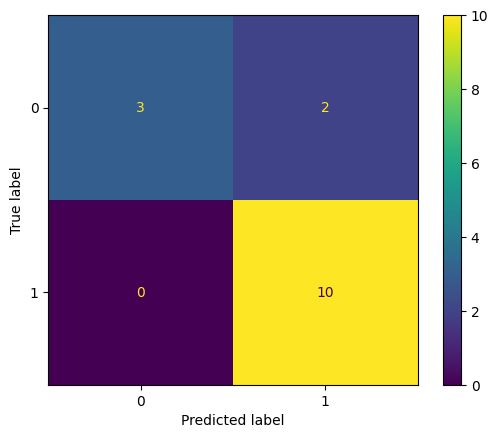

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Neural Network")
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred_NN))
cm.plot()

Recurrent Neural Network


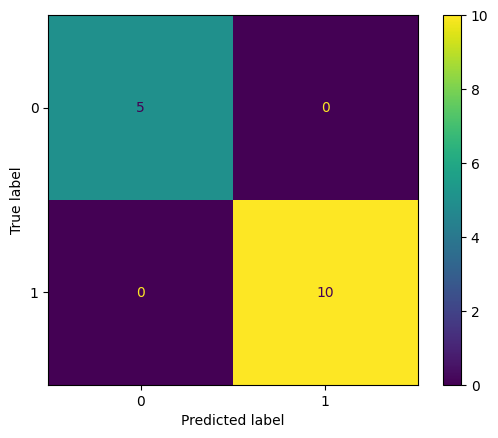

In [31]:
print("Recurrent Neural Network")
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred_LSTM))
cm.plot()

Support Vector Machine


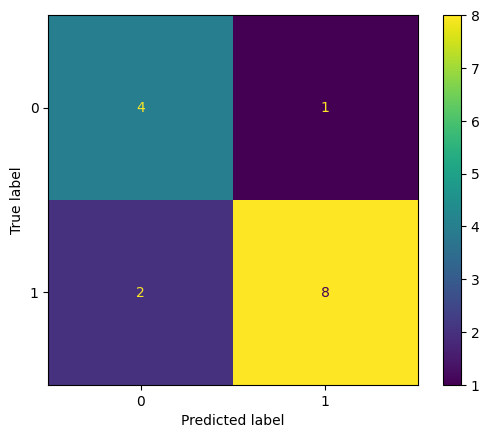

In [32]:
print("Support Vector Machine")
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred_svm))
cm.plot()